[1.32, 1.325, 0, 0.687, 0]
[5.28, 1.325, 0, 0.687, 0]


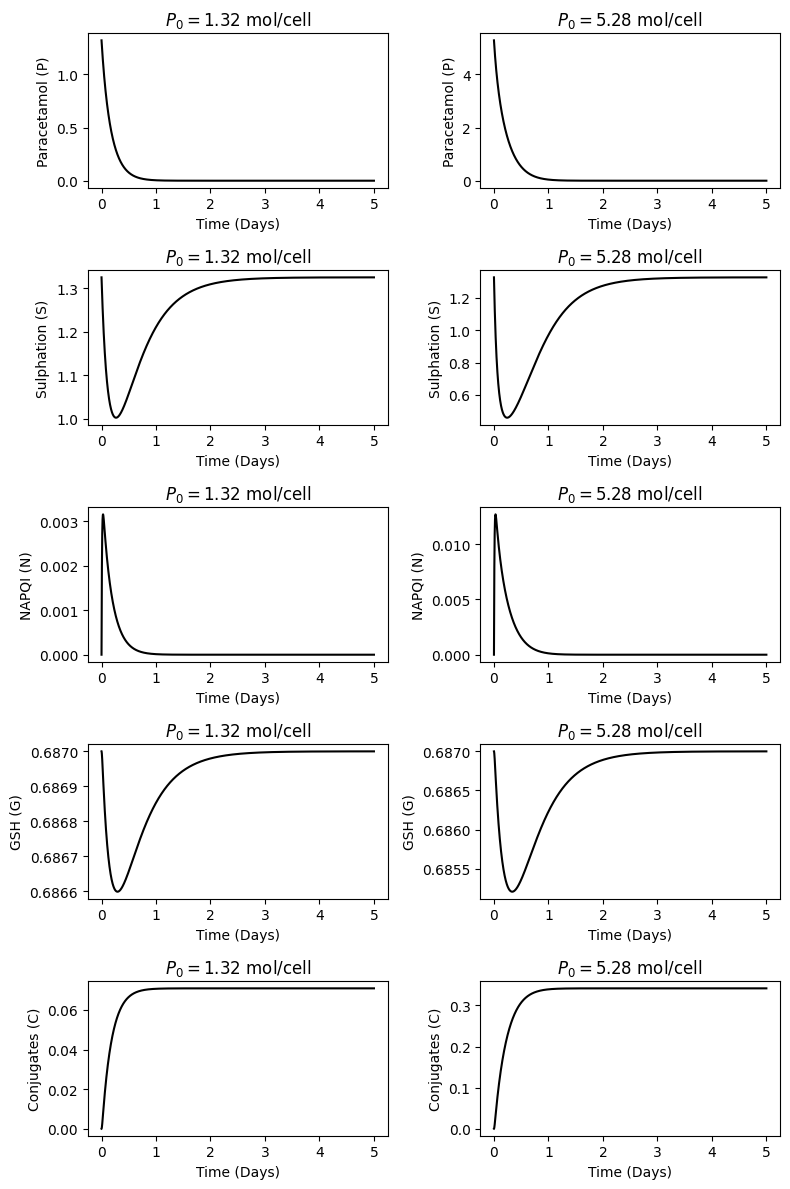

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode
 
"""
Reddyhoff et al. (2015)
https://www.sciencedirect.com/science/article/pii/S0022519315004142
"""
 
def dFdt_original(F,t):
    """
    System of differential equations.
    Equations 1-5 in Reddyhoff et al. (2015)
    """
    dF = [0,0,0,0,0] # P, S, N, G, C
    P = F[0]
    S = F[1]
    N = F[2]
    G = F[3]
    C = F[4]
 
    dF[0] = -k_s*S*P - k_G*P - k_450*P + k_N*N
    dF[1] = -k_s*S*P + b_s - d_s*S
    dF[2] = k_450*P - k_N*N - k_GSH*N*G - k_PSH*N
    dF[3] = -k_GSH*N*G + b_G - d_G*G
    dF[4] = k_PSH*N
   
    return dF

### Parameters ###
# I commented out the order of magnitude from all the very large/very small parameters
# This still needs to be fixed, since the parameters are different relative to each other
# But it makes the plots look like Figure 4 in the paper.
d_G = 2
b_G = 1.374#e-14
k_GSH = 1.6#e18
k_G = 2.99
k_s = 2.26#e14
b_s = 2.65#e-14
d_s = 2
k_450 = 0.315
k_N = 0.0315
k_PSH = 110
 
# Times
t_min = 0
t_max = 5
dt = 0.001
times = np.arange(t_min, t_max+dt, dt) #generate time-grid list
 
### Simulation ###

# titles for plots:
variables = ["Paracetamol (P)", "Sulphation (S)", "NAPQI (N)", "GSH (G)", "Conjugates (C)"]
# the 2 initial conditions for P0 that the paper used:
P0 = [1.32, 5.28]

fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i, initial_P0 in enumerate(P0):
    # Running a simulation for each case of P0:
    F0 = [initial_P0, b_s/d_s, 0, b_G/d_G, 0]
    print(F0)
    F = odeint(dFdt_original, F0, times)  # Run simulation
    for j, variable in enumerate(variables):
        # Plotting each subplot:
        axes[j, i].plot(times, F[:,j], 'k')
        axes[j, i].set_xlabel("Time (Days)")
        axes[j, i].set_ylabel(f"{variables[j]}")
        axes[j, i].set_title(f"$P_0 = {initial_P0}$ mol/cell")

plt.tight_layout()
plt.show()